# Football Player Price Visualization & Prediction

## Football Player Price Visualization

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fb=pd.read_csv('C:\\Users\\gunee\\Downloads\\football.csv')

In [3]:
fb.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


### Distribution Of Market Value


C:\Users\gunee\Anaa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


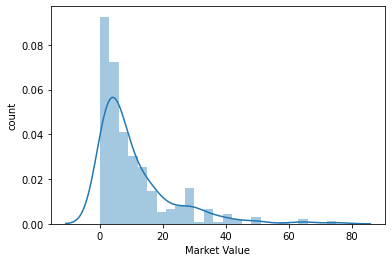

In [4]:
sns.distplot(fb.market_value)
plt.xlabel('Market Value')
plt.ylabel('count')
plt.show()

Clearly not a normal distribution, but this was expected. Teams tend to have few elite players, and a large number of low + mid value players in their squads. An analysis of a team’s 1st 15 would probably look more like a normal distribution, since we’d be excluding low value fringe / youth players.

### Distribution Of Popularity

C:\Users\gunee\Anaa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


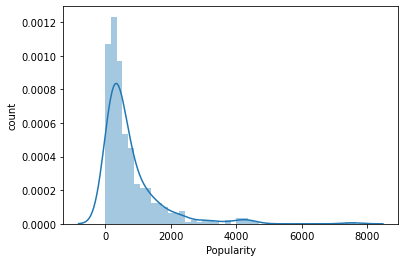

In [5]:
sns.distplot(fb.page_views)
plt.xlabel('Popularity')
plt.ylabel('count')
plt.show()

Similar distribution to market value, except the presence of outliers as the popularity comes close to 8000

### FPL Valuation


C:\Users\gunee\Anaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


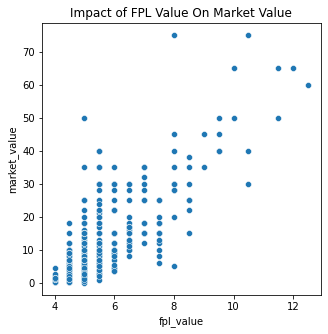

In [6]:
g = sns.scatterplot(fb.fpl_value,fb.market_value)

g.figure.set_size_inches(5,5)

plt.title("Impact of FPL Value On Market Value")
plt.show()

There seems to be nice agreement between the FPL value and market value, 
despite the fact that FPL valuation is decidedly shorter term, so age would be less of a factor. 

### Market Value with Age
It is fairly intuitive that older players will, on average, have lower market values. A rough illustration -

C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you ma

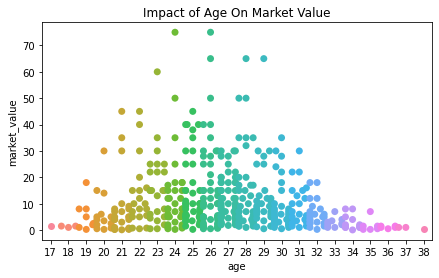

In [7]:
g = sns.swarmplot(x = "age",
              y= 'market_value', 
              data = fb,
              size = 7)

g.figure.set_size_inches(7,4)

plt.title("Impact of Age On Market Value")
plt.show()

### Relationship between Player Position and market value


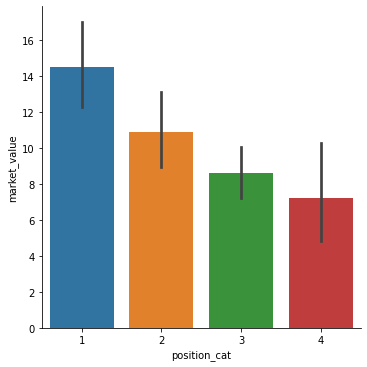

In [8]:
sns.catplot(x="position_cat", y="market_value", kind="bar", data=fb)

Attackers and midfielders have higher values in market

### Region and Market Value Dependence

C:\Users\gunee\Anaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


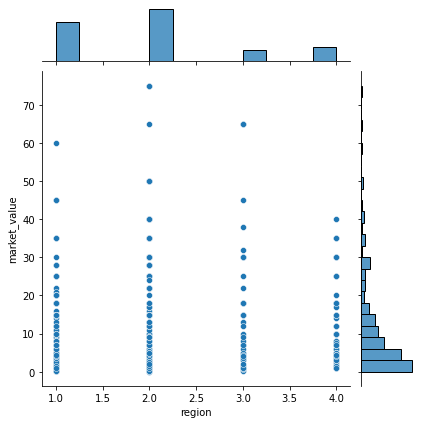

In [9]:
sns.jointplot( fb.region,fb.market_value)
plt.show()

### Market Value of Players from Big Clubs

C:\Users\gunee\Anaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


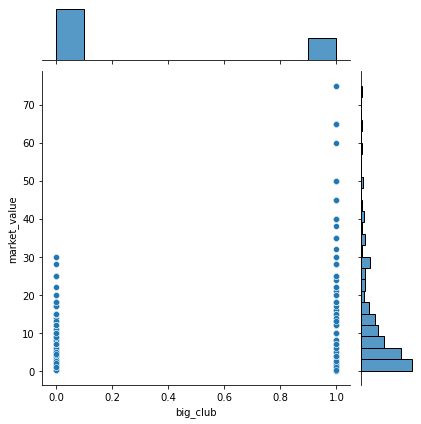

In [10]:
sns.jointplot( fb.big_club,fb.market_value)
plt.show()

### Top 5  Valuable Players based on market value

In [11]:
fb.nlargest(5,'market_value')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2.0,Belgium,0,3,5,1,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
240,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,17.50%,199,2.0,Belgium,0,3,11,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3.0,Argentina,0,4,11,1,0


### Simple Correlation

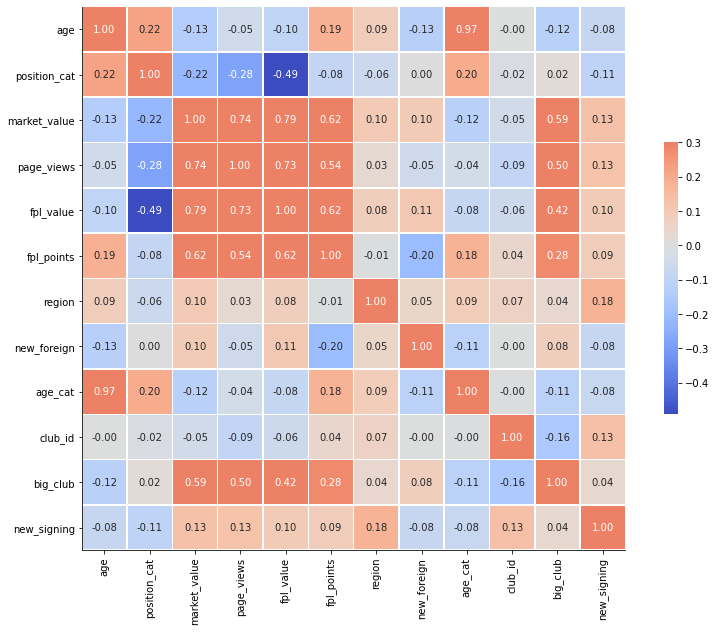

In [12]:
corr = fb.corr()

g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')

sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

As it can be implied from the heatmap easily, Market Vaue depends on various factors, namely
Page views, Fpl_value, Fpl_points (Pairplots shown below also depict this fact)

# Subset data and create Stacked Plot between club and nationality

In [13]:
fb.club.unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [14]:
fb.nationality.unique()

array(['Chile', 'Germany', 'Czech Republic', 'England', 'France', 'Spain',
       'Nigeria', 'Switzerland', 'Wales', 'Brazil', 'Egypt', 'Argentina',
       'Colombia', 'Bosnia', 'Norway', 'Poland', 'Scotland', 'Congo DR',
       'Ireland', 'Netherlands', 'Australia', "Cote d'Ivoire", 'Finland',
       'Cameroon', 'Austria', 'Israel', 'Northern Ireland', 'Canada',
       'Belgium', 'Iceland', 'Serbia', 'Portugal', 'Ghana', 'South Korea',
       'Mali', 'Senegal', 'Curacao', 'Denmark', 'Slovenia',
       'Trinidad and Tobago', 'Bermuda', 'Benin', 'Algeria', 'Jamaica',
       'Japan', 'Tunisia', 'Croatia', 'Estonia', 'Ecuador', 'Armenia',
       'Italy', 'Sweden', 'United States', 'Morocco', 'The Gambia',
       'Kenya', 'Greece', 'Uruguay', 'Romania', 'Venezuela',
       'New Zealand'], dtype=object)

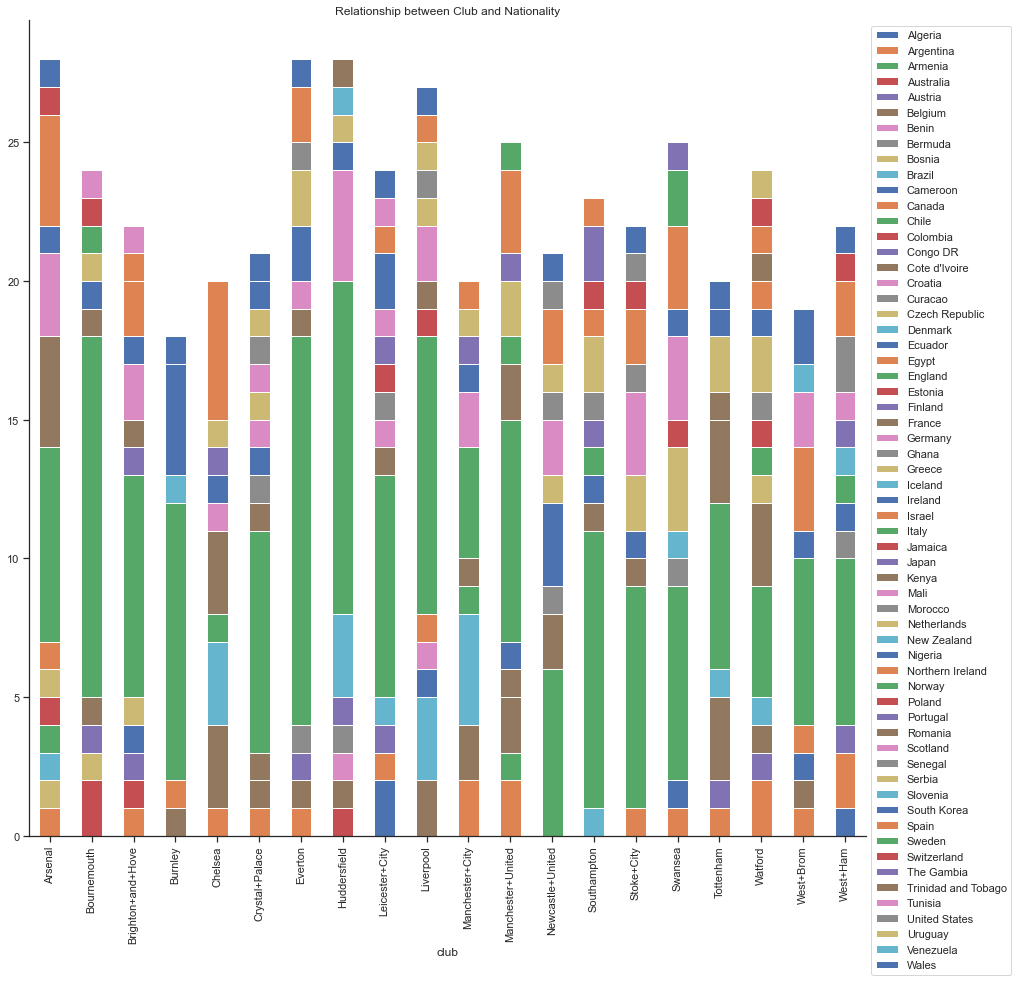

In [15]:
sns.set(style="ticks")

filtered_fb = fb[
    (fb['club'].isin(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham']) & 
                      (fb['nationality'].isin(['Chile', 'Germany', 'Czech Republic', 'England', 'France', 'Spain',
       'Nigeria', 'Switzerland', 'Wales', 'Brazil', 'Egypt', 'Argentina',
       'Colombia', 'Bosnia', 'Norway', 'Poland', 'Scotland', 'Congo DR',
       'Ireland', 'Netherlands', 'Australia', "Cote d'Ivoire", 'Finland',
       'Cameroon', 'Austria', 'Israel', 'Northern Ireland', 'Canada',
       'Belgium', 'Iceland', 'Serbia', 'Portugal', 'Ghana', 'South Korea',
       'Mali', 'Senegal', 'Curacao', 'Denmark', 'Slovenia',
       'Trinidad and Tobago', 'Bermuda', 'Benin', 'Algeria', 'Jamaica',
       'Japan', 'Tunisia', 'Croatia', 'Estonia', 'Ecuador', 'Armenia',
       'Italy', 'Sweden', 'United States', 'Morocco', 'The Gambia',
       'Kenya', 'Greece', 'Uruguay', 'Romania', 'Venezuela',
       'New Zealand'])))]

#print(filtered_fb)

df_plot=filtered_fb.groupby(['club', 'nationality']).size().reset_index().pivot(columns='club', index='nationality', values=0).reset_index()

g = df_plot.set_index('nationality').T.plot(kind='bar', stacked=True, color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(15,15) 
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Relationship between Club and Nationality')
plt.show()

# Pairplots

In [16]:
filtered_fb.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


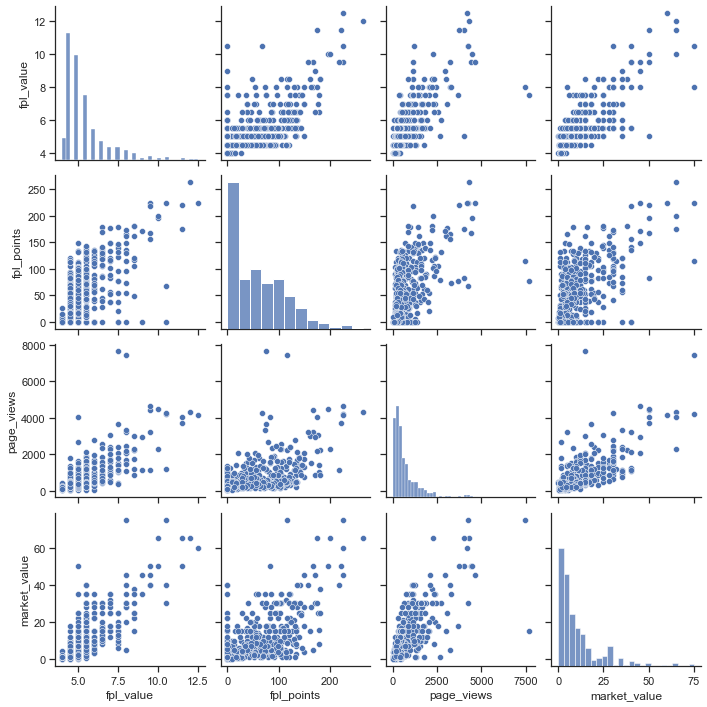

In [17]:
g = sns.pairplot(filtered_fb[['fpl_value','fpl_sel','fpl_points','page_views','market_value']])

C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunee\Anaa\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you ma

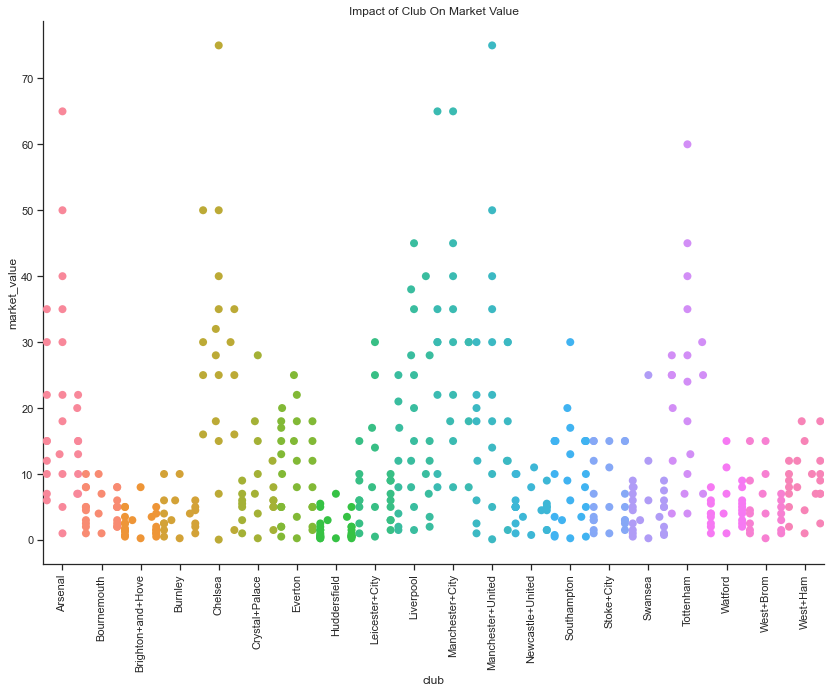

In [18]:
g = sns.swarmplot(x = "club",
              y= 'market_value', 
              data = filtered_fb,
              size = 8)

sns.despine()
g.figure.set_size_inches(14,10)
plt.xticks(rotation=90)
plt.title("Impact of Club On Market Value")
plt.show()

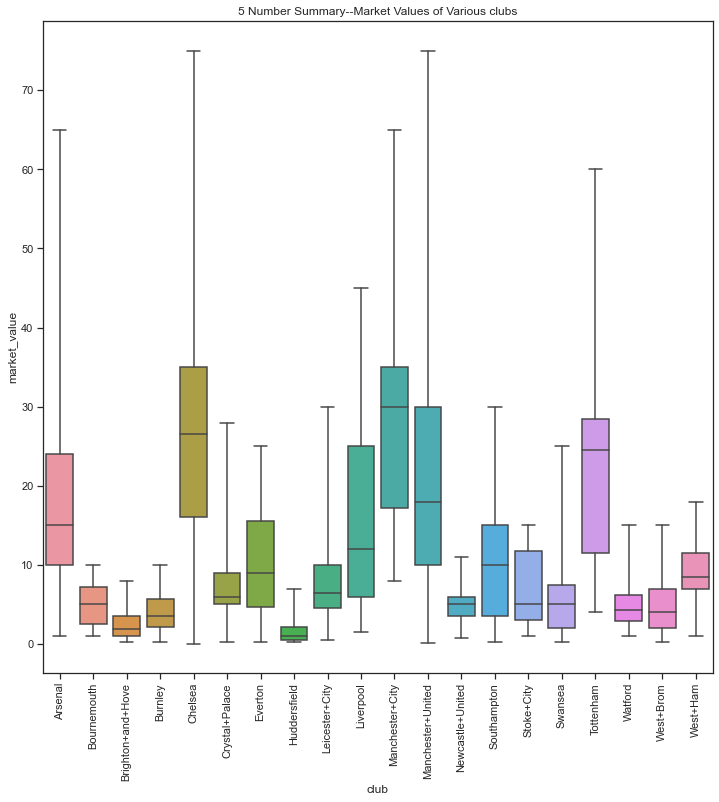

In [19]:
g = sns.boxplot(x = "club",
              y = 'market_value', 
              data = filtered_fb, whis=np.inf)

g.figure.set_size_inches(12,12)
plt.xticks(rotation=90)
plt.title("5 Number Summary--Market Values of Various clubs")
plt.show()

# INSIGHTS


Factors that generate a higher market value are:
1. Attackers and Defenders
2. Players aged 22 to 28 
3. Page Views
4. European players 
5. higher fpl_values,higher fpl_points and more page_views

Another factor:
1. Mostly Armenians are part of different clubs
2. Market value generated by non big clubs is denser but the non big clubs generate highest market_value

In [20]:
fb.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


# Football Player Price Prediction

# LINEAR REGRESSION


As illustrated from the heatmap, one can see that Market Value and Fpl_Value have highest correlation, numerically, 0.79. 

Thus, Prioritizing fpl_value attribute to predict market_value

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score

### Normalizing the data

In [22]:
X = fb['fpl_value'].values
Y = fb['market_value'].values

In [23]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[ : , -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[ : , -1]

### Splitting the Data

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

### Error Function

In [25]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t)**2)
    return e * 1/(2 * N)

### Update Function

In [26]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

### Gradient Descent Function

In [27]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = []
    mc_values = []
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print("Error less than the threshold. Stopping the gradient descent.")
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values

In [28]:
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

### Visualization

In [29]:
mc_values_anim = mc_values[0:250:5]

In [30]:
def init():
    plt.scatter(xtest, ytest, color='g')
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,

def update_frame(frame):
    m, c = mc_values_anim[frame]
    x1, y1 = -0.5, m * -.5 + c
    x2, y2 = 1.5, m * 1.5 + c
    ln.set_data([x1, x2], [y1, y2])
    return ln,

### Visualization of the learning process

C:\Users\gunee\Anaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


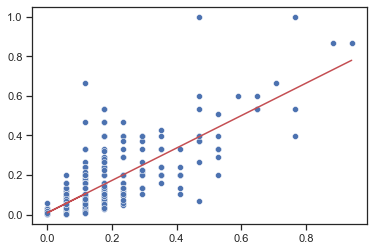

In [31]:
sns.scatterplot(xtrain, ytrain)
plt.plot(xtrain, (m * xtrain + c), color='r')

### Plottimg Error Values

Text(0.5, 0, 'Iterations')

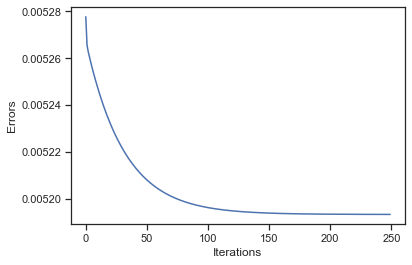

In [32]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Errors')
plt.xlabel('Iterations')

### Prediction

### Calculate the predictions

In [33]:
predicted = (m * xtest + c)

In [34]:
# Calculate MSE for the predicted value on the testing set
mean_squared_error(ytest, predicted)

0.008932733584236246

In [35]:
# Putting xtest, ytest and predicted values into a single DataFrame
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns=['x', 'target_y', 'predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.117647,0.146097,0.105115
1,0.058824,0.019346,0.056918
2,0.647059,0.666444,0.538891
3,0.294118,0.226151,0.249707
4,0.352941,0.466311,0.297905


### Reshape Normalization

In [36]:
predicted  = predicted.reshape(-1,1)
xtest  = xtest.reshape(-1,1)
ytest  = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[ : , -1]
ytest_scaled = ytest_scaled[ : , -1]
predicted_scaled = predicted_scaled[ : , -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns=['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head(10)

,x,target_y,predicted_y
0,5.0,11.0,7.93
1,4.5,1.5,4.32
2,9.5,50.0,40.44
3,6.5,17.0,18.77
4,7.0,35.0,22.38
5,4.5,4.0,4.32
6,4.5,1.0,4.32
7,7.5,18.0,25.99
8,6.5,18.0,18.77
9,5.0,22.0,7.93
